# Разработка A/B-тестирования и анализ результатов

Вы работаете продуктовым аналитиком в компании, которая разрабатывает развлекательное приложение с функцией «бесконечной» ленты, как, например, в приложениях с короткими видео. В вашем приложении существует две модели монетизации: первая — ежемесячная платная подписка, которая позволяет пользователям смотреть ленту без рекламы, вторая — демонстрация рекламы для пользователей, которые ещё не оформили подписку.

Команда разработчиков рекомендательных систем создала новый алгоритм рекомендаций, который, по их мнению, будет показывать более интересный контент для каждого пользователя. Вас, как аналитика, просят помочь рассчитать параметры A/B-теста, который позволит проверить эту гипотезу, и проанализировать его результаты.

## Описание данных

Вы будете работать с тремя таблицами:

- `sessions_project_history.csv` — таблица с историческими данными по сессиям пользователей на период с 2025-08-15 по 2025-09-23. Путь к файлу: `/datasets/sessions_project_history.csv`.

- `sessions_project_test_part.csv` — таблица с данными за первый день проведения A/B-теста, то есть за 2025-10-14. Путь к файлу: `/datasets/sessions_project_test_part.csv`.

- `sessions_project_test.csv` — таблица с данными за весь период проведения A/B-теста, то есть с 2025-10-14 по 2025-11-02. Путь к файлу: `/datasets/sessions_project_test.csv`.

У этих таблиц почти совпадает структура и содержание колонок, различаются лишь периоды наблюдения.

Поля таблиц `sessions_project_history.csv`, `sessions_project_test.csv`, `sessions_project_test_part.csv`:

- `user_id` — идентификатор пользователя;

- `session_id` — идентификатор сессии в приложении;

- `session_date` — дата сессии;

- `session_start_ts` — дата и время начала сессии;

- `install_date` — дата установки приложения;

- `session_number` — порядковый номер сессии для конкретного пользователя;

- `registration_flag` — является ли пользователь зарегистрированным;

- `page_counter` — количество просмотренных страниц во время сессии;

- `region` — регион пользователя;

- `device` — тип устройства пользователя;

- `test_group` — тестовая группа (в таблице с историческими данными этого столбца нет).


## Что нужно сделать
Ваши задачи: рассчитать параметры теста, оценить корректность его проведения и проанализировать результаты эксперимента.

### 1. Работа с историческими данными (EDA)

#### 1.1. Загрузка исторических данных
На первом этапе поработайте с историческими данными приложения:

- Импортируйте библиотеку pandas.

- Считайте и сохраните в датафрейм `sessions_history` CSV-файл с историческими данными о сессиях пользователей `sessions_project_history.csv`.

Выведите на экран первые пять строк полученного датафрейма.

In [1]:
import pandas as pd

In [2]:
sessions_history = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_history.csv')

In [3]:
display(sessions_history)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
0,E302123B7000BFE4,F9AF61A0C2023832,2025-08-15,2025-08-15 17:47:35,2025-08-15,1,0,3,CIS,iPhone
1,2530F72E221829FB,85003A206CBDAC6F,2025-08-15,2025-08-15 16:42:14,2025-08-15,1,0,4,MENA,Android
2,876E020A4FC512F5,3677423E49D72DEE,2025-08-15,2025-08-15 12:30:00,2025-08-15,1,0,4,EU,PC
3,2640B349E1D81584,956B45F5915CA225,2025-08-15,2025-08-15 15:31:31,2025-08-15,1,0,4,CIS,Android
4,94E1CBFAEF1F5EE9,83BF0DA35F9F1F40,2025-08-15,2025-08-15 21:33:53,2025-08-15,1,0,3,CIS,Android
...,...,...,...,...,...,...,...,...,...,...
435919,769BC199AF26FEF8,914903B51D69C5EA,2025-09-17,2025-09-17 21:33:57,2025-09-04,3,1,3,CIS,PC
435920,599DED39F3CD2ADE,66ADBE343C94DCDA,2025-09-17,2025-09-17 17:11:46,2025-09-04,4,0,4,MENA,iPhone
435921,1FA20C4BC94E64B2,C4CCD7E81733665F,2025-09-17,2025-09-17 19:36:55,2025-09-04,4,0,4,CIS,Android
435922,88E5FC3016A7A0AD,6834FB4914B56200,2025-09-17,2025-09-17 22:13:33,2025-09-04,5,0,4,MENA,PC


#### 1.2. Знакомство с данными
- Для каждого уникального пользователя `user_id` рассчитайте количество уникальных сессий `session_id`.

- Выведите на экран все данные из таблицы `sessions_history` для одного пользователя с наибольшим количеством сессий. Если таких пользователей несколько, выберите любого из них.

- Изучите таблицу для одного пользователя, чтобы лучше понять логику формирования каждого столбца данных.



In [4]:
# Количество уникальных сессий для каждого пользователя
user_sessions = sessions_history.groupby('user_id')['session_id'].nunique().reset_index()
user_sessions.columns = ['user_id', 'unique_sessions']

# Пользователь с max количеством сессий
max_sessions_user = user_sessions[user_sessions['unique_sessions'] == user_sessions['unique_sessions'].max()]['user_id'].iloc[0]

# Выведем все данные для выбранного пользователя
user_data = sessions_history[sessions_history['user_id'] == max_sessions_user]
display(user_data)

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device
115558,10E0DEFC1ABDBBE0,B8F0423BBFFCF5DC,2025-08-14,2025-08-14 13:57:39,2025-08-14,1,0,4,CIS,Android
191751,10E0DEFC1ABDBBE0,87CA2FA549473837,2025-08-15,2025-08-15 16:42:10,2025-08-14,2,0,3,CIS,Android
239370,10E0DEFC1ABDBBE0,4ADD8011DCDCE318,2025-08-16,2025-08-16 19:53:21,2025-08-14,3,0,3,CIS,Android
274629,10E0DEFC1ABDBBE0,DF0FD0E09BF1F3D7,2025-08-17,2025-08-17 15:03:43,2025-08-14,4,0,1,CIS,Android
302501,10E0DEFC1ABDBBE0,3C221774B4DE6885,2025-08-18,2025-08-18 17:29:14,2025-08-14,5,0,4,CIS,Android
325557,10E0DEFC1ABDBBE0,031BD7A67048105B,2025-08-19,2025-08-19 13:23:55,2025-08-14,6,0,2,CIS,Android
345336,10E0DEFC1ABDBBE0,FF4315CF4AD4B100,2025-08-20,2025-08-20 19:31:54,2025-08-14,7,0,2,CIS,Android
377532,10E0DEFC1ABDBBE0,4045FEA0747203B4,2025-08-22,2025-08-22 17:54:13,2025-08-14,8,0,2,CIS,Android
403538,10E0DEFC1ABDBBE0,344B086C421C7F37,2025-08-24,2025-08-24 14:46:13,2025-08-14,9,0,2,CIS,Android
414743,10E0DEFC1ABDBBE0,054F20BA371E4C9D,2025-08-25,2025-08-25 18:36:41,2025-08-14,10,0,3,CIS,Android


Мы видим, что пользователь 10E0DEFC1ABDBBE0 оказался самым активным, с 10 уникальными сессиями за период с 14 по 25 августа 2025

In [5]:
display(user_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 115558 to 414743
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            10 non-null     object
 1   session_id         10 non-null     object
 2   session_date       10 non-null     object
 3   session_start_ts   10 non-null     object
 4   install_date       10 non-null     object
 5   session_number     10 non-null     int64 
 6   registration_flag  10 non-null     int64 
 7   page_counter       10 non-null     int64 
 8   region             10 non-null     object
 9   device             10 non-null     object
dtypes: int64(3), object(7)
memory usage: 880.0+ bytes


None

**Общий вывод**

- Пользователь имеет 10 сессий, что соответсвует фильтрации.
- Данные корректные, без пропусков.
- Типы данных соответствуют данным, но можно преобразовать даты в datetime

#### 1.3. Анализ числа регистраций
Одна из важнейших метрик продукта — число зарегистрированных пользователей. Используя исторические данные, визуализируйте, как менялось число регистраций в приложении за время его существования.

- Агрегируйте исторические данные и рассчитайте число уникальных пользователей и число зарегистрированных пользователей для каждого дня наблюдения. Для простоты считайте, что у пользователя в течение дня бывает одна сессия максимум и статус регистрации в течение одного дня не может измениться.

- Постройте линейные графики общего числа пользователей и общего числа зарегистрированных пользователей по дням. Отобразите их на одном графике.

- Постройте отдельный линейный график доли зарегистрированных пользователей от всех пользователей по дням.

- На обоих графиках должны быть заголовок, подписанные оси X и Y, сетка и легенда.

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Преобразуем дату сессии в формат datetime
sessions_history['session_date'] = pd.to_datetime(sessions_history['session_date'])

In [8]:
# Агрегируем по дате
daily_data = sessions_history.groupby('session_date').agg(
    total_users=('user_id', 'nunique'),
    registered_users=('registration_flag', lambda x: (x == 1).sum())
).reset_index()
display(daily_data)

,session_date,total_users,registered_users
0,2025-08-11,3919,169
1,2025-08-12,6056,336
2,2025-08-13,8489,464
3,2025-08-14,10321,625
4,2025-08-15,14065,840
5,2025-08-16,12205,916
6,2025-08-17,11200,833
7,2025-08-18,10839,860
8,2025-08-19,12118,831
9,2025-08-20,13514,1008


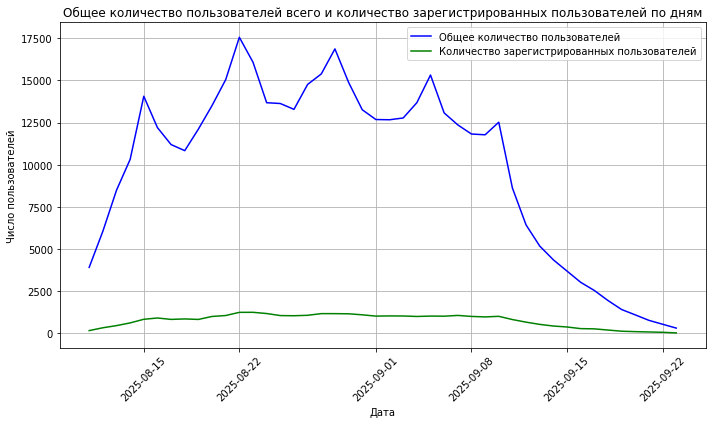

In [9]:
# Визуализация общего числа пользователей и числа зарегистрированных пользователей
plt.figure(figsize=(10, 6))
plt.plot(daily_data['session_date'], daily_data['total_users'], label='Общее количество пользователей', color='b')
plt.plot(daily_data['session_date'], daily_data['registered_users'], label='Количество зарегистрированных пользователей', color='g')
plt.xlabel('Дата')
plt.ylabel('Число пользователей')
plt.title('Общее количество пользователей всего и количество зарегистрированных пользователей по дням')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Выводы:**

- общее количество пользователей в день имеет волнообразный характер с пиками и спадами
- количество зарегистрированных пользователей существенно ниже, но также имеет характер, схожий с общим числом пользователей
- после 10 сентября наблюдается значительное снижение активности пользователей

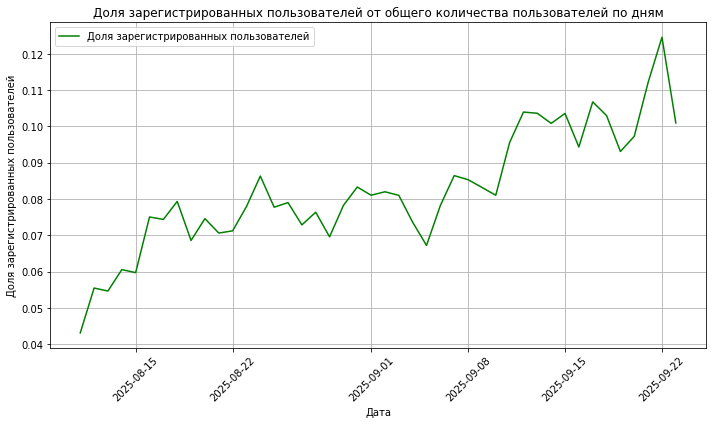

In [10]:
# Визуализация доли зарегистрированных пользователей от общего количества пользователей
daily_data['registration_rate'] = daily_data['registered_users'] / daily_data['total_users']
plt.figure(figsize=(10, 6))
plt.plot(daily_data['session_date'], daily_data['registration_rate'], label='Доля зарегистрированных пользователей', color='g')
plt.xlabel('Дата')
plt.ylabel('Доля зарегистрированных пользователей')
plt.title('Доля зарегистрированных пользователей от общего количества пользователей по дням')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Выводы:**

- доля зарегистрированных пользователей постепенно растет, начиная с 4-5%, достигая более 10% ближе к концу периода
- после 10 сентября, когда общее количество пользователей падает, доля зарегистрированных пользователей наоборот растет, что может быть показателем более высокой конверсии среди оставшихся активных пользователей

**Общий вывод:**

- В первые недели после запуска активность пользователей росла, затем достигла пика и начала снижаться.
- Количество новых регистраций в день также начало снижаться после 10 сентября, но доля зарегистрированных пользователей выросла.

Это может быть показателем того, что первоначальный всплеск трафика (возможно, за счет рекламы или маркетинговых акций) привел много пользователей, но затем общий интерес к продукту снизился.
Но повышение доли регистраций может говорить о том, что оставшиеся пользователи стали более мотивированными или улучшились процессы (например, упростился сам процесс регистрации, появились бонусы за регистрацию и т. д.)

#### 1.4. Анализ числа просмотренных страниц
Другая важная метрика продукта — число просмотренных страниц в приложении. Чем больше страниц просмотрено, тем сильнее пользователь увлечён контентом, а значит, выше шансы на то, что он зарегистрируется и оплатит подписку.

- Найдите количество сессий для каждого значения количества просмотренных страниц. Например: одну страницу просмотрели в 29160 сессиях, две страницы в 105536 сессиях и так далее.

- Постройте столбчатую диаграмму, где по оси X будет число просмотренных страниц, по оси Y — количество сессий.

- На диаграмме должны быть заголовок, подписанные оси X и Y.

In [11]:
# Количество сессий для каждого значения просмотренных страниц
page_sessions = sessions_history.groupby('page_counter').agg(
    session_count=('session_id', 'nunique')
).reset_index()
display(page_sessions)

,page_counter,session_count
0,1,29160
1,2,105536
2,3,166690
3,4,105569
4,5,26288
5,6,2589
6,7,92


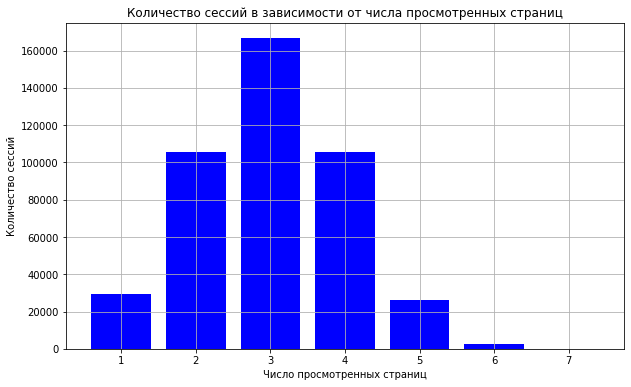

In [12]:
# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(page_sessions['page_counter'], page_sessions['session_count'], color='b')
plt.title('Количество сессий в зависимости от числа просмотренных страниц')
plt.xlabel('Число просмотренных страниц')
plt.ylabel('Количество сессий')
plt.grid(True)
plt.show()

**Выводы:**

- наиболее частое число просмотренных страниц за сессию — 3 (166 690 сессий)
- заметный спад после 3 страниц — количество сессий уменьшается с увеличением числа просмотренных страниц
- очень мало длинных сессий — лишь 92 сессии с 7 просмотренными страницами, что говорит о том, что пользователи редко остаются на сайте долгоя

#### 1.5. Доля пользователей, просмотревших более четырёх страниц
Продуктовая команда продукта считает, что сессии, в рамках которых пользователь просмотрел 4 и более страниц, говорят об удовлетворённости контентом и алгоритмами рекомендаций. Этот показатель является важной прокси-метрикой для продукта.

- В датафрейме `sessions_history` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если было просмотрено меньше.

- Постройте график со средним значением доли успешных сессий ко всем сессиям по дням за весь период наблюдения.

In [13]:
# Добавим столбец good_session
sessions_history['good_session'] = sessions_history['page_counter'].apply(lambda x: 1 if x >= 4 else 0)
display(sessions_history[['session_date', 'page_counter', 'good_session']].head())

,session_date,page_counter,good_session
0,2025-08-15,3,0
1,2025-08-15,4,1
2,2025-08-15,4,1
3,2025-08-15,4,1
4,2025-08-15,3,0


In [14]:
# Рассчитаем среднюю долю успешных сессий
daily_good_session = sessions_history.groupby('session_date').agg(
    good_session_share=('good_session', 'mean')
).reset_index()
display(daily_good_session)

,session_date,good_session_share
0,2025-08-11,0.312835
1,2025-08-12,0.302015
2,2025-08-13,0.306750
3,2025-08-14,0.316055
4,2025-08-15,0.304941
5,2025-08-16,0.306186
6,2025-08-17,0.317589
7,2025-08-18,0.310545
8,2025-08-19,0.312840
9,2025-08-20,0.306941


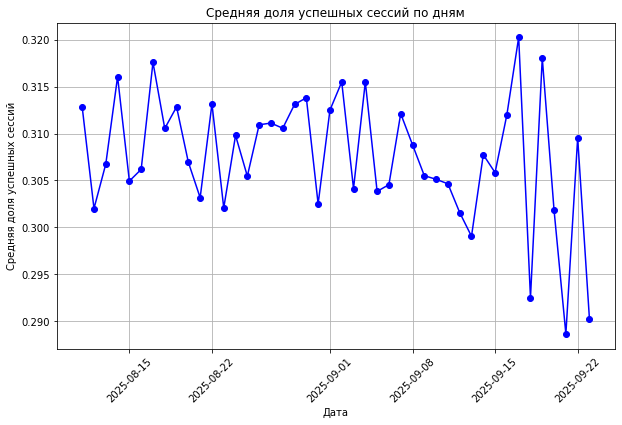

In [15]:
# Визуализируем данные
plt.figure(figsize=(10, 6))
plt.plot(daily_good_session['session_date'], daily_good_session['good_session_share'], color='b', marker='o')
plt.title('Средняя доля успешных сессий по дням')
plt.xlabel('Дата')
plt.ylabel('Средняя доля успешных сессий')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Выводы:**

- доля успешных сессий колеблется в районе 30-32%, т.е. примерно треть пользователей просматривает 4 и более страницы за сессию
- есть небольшие колебания во времени, но в целом резких падений или всплесков нет, тренд стабильный

### 2. Подготовка к тесту
При планировании теста необходимо проделать несколько важных шагов:

- Определиться с целевой метрикой.

- Рассчитать необходимый размер выборки.

- Исходя из текущих значений трафика, рассчитать необходимую длительность проведения теста.

#### 2.1. Расчёт размера выборки
В рамках курса вам уже приходилось рассчитывать размеры выборки, используя онлайн-калькуляторы. В этом задании предлагаем воспользоваться готовым кодом и рассчитать необходимое для вашего дизайна эксперимента количество пользователей.

Для этого установите в коде ниже следующие параметры:

- Уровень значимости — 0.05.

- Вероятность ошибки второго рода — 0.2.

- Мощность теста.

- Минимальный детектируемый эффект, или MDE, — 3%. Обратите внимание, что здесь нужно указать десятичную дробь, а не процент.

При расчёте размера выборки мы будем использовать метод `solve_power()` из класса `power.NormalIndPower` модуля `statsmodels.stats`.

Запустите ячейку и изучите полученное значение.

In [16]:
from statsmodels.stats.power import NormalIndPower

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = mde,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 17441


#### 2.1. Расчёт длительности A/B-теста

Используйте данные о количестве пользователей в каждой выборке и среднем количестве пользователей приложения. Рассчитайте длительность теста, разделив одно на другое.

- Рассчитайте среднее количество уникальных пользователей приложения в день.

- Определите длительность теста, исходя из рассчитанного значения размера выборок и среднего дневного трафика приложения. Количество дней округлите в большую сторону.

In [18]:
from math import ceil

# Среднее количество пользователей приложения в день по историческим данным
avg_daily_users = daily_data['total_users'].mean()

# Умножим размер выборки на 2, т.к у нас две группы A и B
total_sample_size = sample_size * 2

# Рассчитываем длительность теста в днях
test_duration = ceil(total_sample_size / avg_daily_users)

# Выводим результат
print(f"Рассчитанная длительность A/B-теста при текущем уровне трафика в {avg_daily_users} пользователей в день составит {test_duration} дней")

Рассчитанная длительность A/B-теста при текущем уровне трафика в 9907.363636363636 пользователей в день составит 4 дней


**Вывод:**

- для выявления эффекта в 3% при 95% доверительном уровне необходимо 17 441 пользователей в каждой группе
- при среднем трафике в 9907 пользователей в день тест можно завершить за 4 дня

### 3. Мониторинг А/В-теста

#### 3.1. Проверка распределения пользователей

A/B-тест успешно запущен, и уже доступны данные за первые три дня. На этом этапе нужно убедиться, что всё идёт хорошо: пользователи разделены правильным образом, а интересующие вас метрики корректно считаются.

- Считайте и сохраните в датафрейм `sessions_test_part` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test_part.csv`.

- Рассчитайте количество уникальных пользователей в каждой из экспериментальных групп для одного дня наблюдения.

- Рассчитайте и выведите на экран процентную разницу в количестве пользователей в группах A и B. Постройте любую удобную визуализацию, на которой можно было бы увидеть возможное различие двух групп.

Для расчёта процентной разницы воспользуйтесь формулой:
$$P = 100 \cdot  \frac{|A − B|}{A}$$

In [19]:
sessions_test_part = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test_part.csv')
sessions_test_part.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,3404844B53442747,B4901323BD537E45,2025-10-14,2025-10-14 19:28:49,2025-10-14,1,0,3,CIS,Android,B
1,3A2BF4D364E62D89,216FC619308F8788,2025-10-14,2025-10-14 21:11:04,2025-10-14,1,0,3,MENA,iPhone,A
2,79CDAE11E32B1597,EDFCE4AC1A504074,2025-10-14,2025-10-14 21:44:03,2025-10-14,1,0,3,CIS,iPhone,A
3,D6AF8D78297A931F,CF0AC0EEDE92C690,2025-10-14,2025-10-14 19:07:55,2025-10-14,1,0,4,CIS,PC,A
4,37E0CE723AE568E0,2E6ED45E8C86C4E9,2025-10-14,2025-10-14 15:39:44,2025-10-14,1,0,3,CIS,Mac,B


In [20]:
# Количество уникальных пользователей для каждой группы по дням
unique_users_per_group = sessions_test_part.groupby(['session_date', 'test_group'])['user_id'].nunique().reset_index()
unique_users_per_group.head()

,session_date,test_group,user_id
0,2025-10-14,A,1477
1,2025-10-14,B,1466


In [21]:
# Разделим данные по группам
group_a = unique_users_per_group[unique_users_per_group['test_group'] == 'A']
group_b = unique_users_per_group[unique_users_per_group['test_group'] == 'B']

# Объединим данные по датам
comparison = pd.merge(group_a, group_b, on='session_date', suffixes=('_A', '_B'))

# Рассчитаем разницу в процентах
comparison['percentage_difference'] = 100 * abs(comparison['user_id_A'] - comparison['user_id_B']) / comparison['user_id_A']

comparison[['session_date', 'percentage_difference']].head()

,session_date,percentage_difference
0,2025-10-14,0.744753


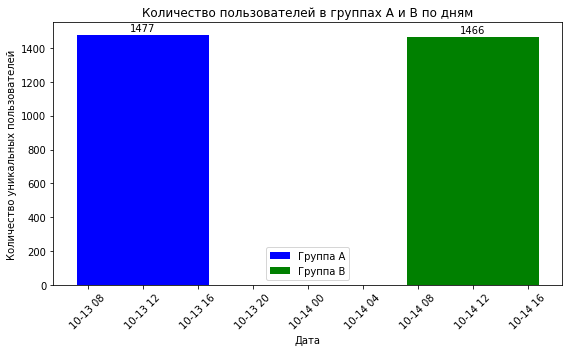

In [22]:
# Убедимся, что session_date в формате datetime
comparison['session_date'] = pd.to_datetime(comparison['session_date'])

# Визуализация разницы между группами A и B
plt.figure(figsize=(8, 5))
bars_a = plt.bar(comparison['session_date'] - pd.Timedelta(hours=12), comparison['user_id_A'], 
                 width=0.4, color='b', label='Группа A', align='center')
bars_b = plt.bar(comparison['session_date'] + pd.Timedelta(hours=12), comparison['user_id_B'], 
                 width=0.4, color='g', label='Группа B', align='center')

# Добавим аннотации на столбцы
for bar in bars_a:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom', color='black')

for bar in bars_b:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, int(yval), ha='center', va='bottom', color='black')

# Настройка графика
plt.title('Количество пользователей в группах A и B по дням')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Вывод:**

- распределение пользователей между группами A и B выглядит сбалансированным, разница между группами составляет менее 1%. 
- тест был запущен корректно, распределение соответствует ожиданиям.

#### 3.2. Проверка пересечений пользователей
Помимо проверки равенства количества пользователей в группах полезно убедиться в том, что группы независимы. Для этого нужно убедиться, что никто из пользователей случайно не попал в обе группы одновременно.

- Рассчитайте количество пользователей, которые встречаются одновременно в группах A и B, или убедитесь, что таких нет.

In [23]:
# Посмотрим пользователей, которые попадают в обе группы
overlay_users = pd.merge(
    group_a[['user_id']],
    group_b[['user_id']],
    on='user_id',
    how='inner')
overlay_users_count = overlay_users['user_id'].nunique()
print(f"Количество пользователей, которые попадают в группы A и B одновременно: {overlay_users_count}")

Количество пользователей, которые попадают в группы A и B одновременно: 0


#### 3.3. Равномерность разделения пользователей по устройствам
Полезно также убедиться в том, что пользователи равномерно распределены по всем доступным категориальным переменным — типам устройства и регионам.

Постройте две диаграммы:

- доля каждого типа устройства для пользователей из группы A,

- доля каждого типа устройства для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение устройств в группах A и B.


In [24]:
# Группировка типу устройства
device_a = sessions_test_part[sessions_test_part['test_group'] == 'A'] \
    .groupby('device')['user_id'].nunique().reset_index(name='user_count')

device_b = sessions_test_part[sessions_test_part['test_group'] == 'B'] \
    .groupby('device')['user_id'].nunique().reset_index(name='user_count')

# Группировка по регионам
region_a = sessions_test_part[sessions_test_part['test_group'] == 'A'] \
    .groupby('region')['user_id'].nunique().reset_index(name='user_count')

region_b = sessions_test_part[sessions_test_part['test_group'] == 'B'] \
    .groupby('region')['user_id'].nunique().reset_index(name='user_count')

# Рассчаем долю каждого устройства и региона
device_a['device_share'] = device_a['user_count'] / device_a['user_count'].sum()
device_b['device_share'] = device_b['user_count'] / device_b['user_count'].sum()

region_a['region_share'] = region_a['user_count'] / region_a['user_count'].sum()
region_b['region_share'] = region_b['user_count'] / region_b['user_count'].sum()

# Сравним распределение устройств между группами
device_comparison = device_a.merge(device_b, on='device', suffixes=('_A', '_B'))
print("\nСравнение распределений типов устройств между группами:")
print(device_comparison[['device', 'device_share_A', 'device_share_B']])

# Сравним распределение регионов между группами
region_comparison = region_a.merge(region_b, on='region', suffixes=('_A', '_B'))
print("\nСравнение распределений регионов между группами:")
print(region_comparison[['region', 'region_share_A', 'region_share_B']])


Сравнение распределений типов устройств между группами:
    device  device_share_A  device_share_B
0  Android        0.444144        0.455662
1      Mac        0.105619        0.100955
2       PC        0.249831        0.259891
3   iPhone        0.200406        0.183492

Сравнение распределений регионов между группами:
  region  region_share_A  region_share_B
0    CIS        0.436019        0.439973
1     EU        0.151659        0.148022
2   MENA        0.412322        0.412005


Распределение пользователей по устройствам и регионам в группах A и B достаточно равномерное, т.к доли в группах почти идентичны.

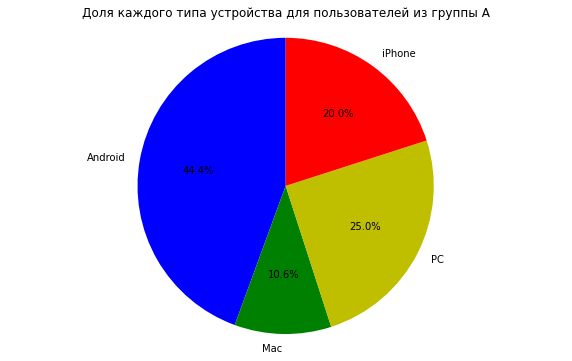

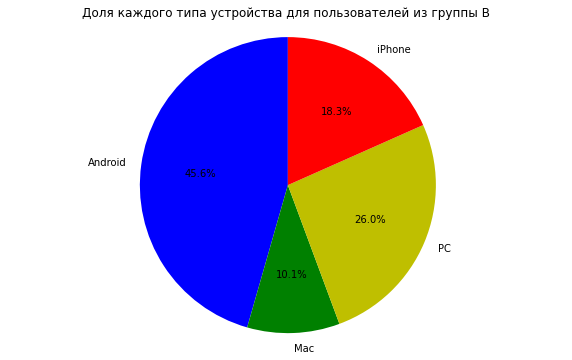

In [25]:
# Группа A
plt.figure(figsize=(10, 6))
plt.pie(device_a['device_share'], labels=device_a['device'], autopct='%1.1f%%', startangle=90, colors=['b', 'g', 'y', 'r'])
plt.title('Доля каждого типа устройства для пользователей из группы A')
plt.ylabel('')
plt.axis('equal')
plt.show()

# Группа B
plt.figure(figsize=(10, 6))
plt.pie(device_b['device_share'], labels=device_b['device'], autopct='%1.1f%%', startangle=90, colors=['b', 'g', 'y', 'r'])
plt.title('Доля каждого типа устройства для пользователей из группы B')
plt.ylabel('')
plt.axis('equal')
plt.show()

#### 3.4. Равномерность распределения пользователей по регионам
Теперь убедитесь, что пользователи равномерно распределены по регионам.

Постройте две диаграммы:

- доля каждого региона для пользователей из группы A,

- доля каждого региона для пользователей из группы B.

Постарайтесь добавить на диаграммы все необходимые подписи, пояснения и заголовки, которые позволят сделать вывод о том, совпадает ли распределение регионов в группах A и B. Постарайтесь использовать другой тип диаграммы, не тот, что в прошлом задании.


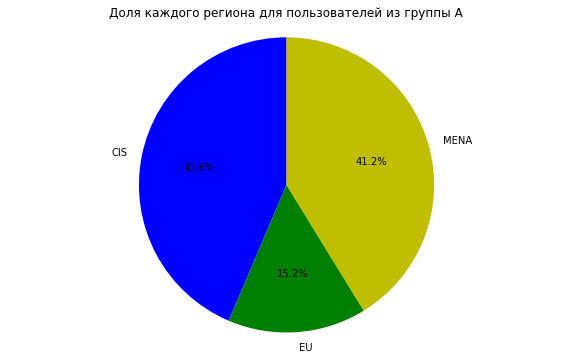

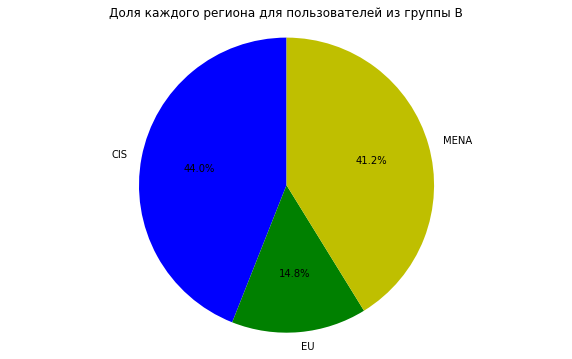

In [26]:
# Группа A по регионам
plt.figure(figsize=(10, 6))
plt.pie(region_a['region_share'], labels=region_a['region'], autopct='%1.1f%%', startangle=90, colors=['b', 'g', 'y', 'r'])
plt.title('Доля каждого региона для пользователей из группы A')
plt.ylabel('')  # Убираем лишнюю метку с оси Y
plt.axis('equal')  # Сохраняем круглый вид диаграммы
plt.show()

# Группа В по регионам
plt.figure(figsize=(10, 6))
plt.pie(region_b['region_share'], labels=region_b['region'], autopct='%1.1f%%', startangle=90, colors=['b', 'g', 'y', 'r'])
plt.title('Доля каждого региона для пользователей из группы B')
plt.ylabel('')  # Убираем лишнюю метку с оси Y
plt.axis('equal')  # Сохраняем круглый вид диаграммы
plt.show()

#### 3.5. Вывод после проверки A/B-теста

На основе проведённого анализа A/B-теста сформулируйте и запишите свои выводы. В выводе обязательно укажите:

- Были ли обнаружено различие в количестве пользователей в двух группах.

- Являются ли выборки независимыми. Было ли обнаружено пересечение пользователей из тестовой и контрольной групп.

- Сохраняется ли равномерное распределение пользователей тестовой и контрольной групп по категориальным переменным: устройствам и регионам.

Сделайте заключение о том, корректно ли проходит A/B-тест или наблюдаются какие-либо нарушения.

**Выводы:**

1. Различие в количестве пользователей между группами A и B составляет около 0.75%, что указывает на то, что пользователи были равномерно распределены между группами и существенного различия в их количестве не наблюдается
2. В ходе проверки независимости выборок мы не обнаружили пользователей, которые случайно попали в обе группы.
3. Распределение пользователей по типам устройств в группах A и B почти идентично, с минимальными отклонениями в долях. 
4. Распределение пользователей по регионам в группах также оказалось схожим, с незначительными отклонениями в долях для каждого региона. 

**Итоговый вывод:**

A/B-тест проходит корректно, его можно считать корректным для дальнейшего анализа и проведения

### 4. Проверка результатов A/B-теста

A/B-тест завершён, и у вас есть результаты за все дни проведения эксперимента. Необходимо убедиться в корректности теста и верно интерпретировать результаты.

#### 4.1. Получение результатов теста и подсчёт основной метрики

- Считайте и сохраните в датафрейм `sessions_test` CSV-файл с историческими данными о сессиях пользователей `sessions_project_test.csv`.

- В датафрейме `sessions_test` создайте дополнительный столбец `good_session`. В него войдёт значение `1`, если за одну сессию было просмотрено 4 и более страниц, и значение `0`, если просмотрено меньше.

In [27]:
sessions_test = pd.read_csv('https://code.s3.yandex.net/datasets/sessions_project_test.csv')
sessions_test.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B


In [28]:
# Создаем дополнительный столбец good_session
sessions_test['good_session'] = sessions_test['page_counter'].apply(lambda x: 1 if x >= 4 else 0)
sessions_test.head()

,user_id,session_id,session_date,session_start_ts,install_date,session_number,registration_flag,page_counter,region,device,test_group,good_session
0,6DAE3B3654DA738E,C69249E26E58F6E2,2025-10-26,2025-10-26 18:15:05,2025-10-16,3,0,3,MENA,Android,A,0
1,0A3FE5D1DD59110A,66D66D7C9F5181B7,2025-10-21,2025-10-21 17:04:53,2025-10-15,2,1,2,CIS,Android,B,0
2,2041F1D7AA740B88,50DE51D42215E74C,2025-10-23,2025-10-23 17:39:29,2025-10-19,3,0,2,MENA,Android,A,0
3,43D7585009168086,5763C0C353C22263,2025-10-24,2025-10-24 15:01:57,2025-10-18,4,0,1,CIS,iPhone,B,0
4,15AD68B14D62D88C,B1AD09F93C1053BC,2025-10-17,2025-10-17 17:34:39,2025-10-17,1,0,2,MENA,Android,B,0


#### 4.2. Проверка корректности результатов теста

Прежде чем приступать к анализу ключевых продуктовых метрик, необходимо убедиться, что тест проведён корректно и вы будете сравнивать две сопоставимые группы.

- Рассчитайте количество уникальных сессий для каждого дня и обеих тестовых групп, используя группировку.

- Проверьте, что количество уникальных дневных сессий в двух выборках не различается или различия не статистически значимы. Используйте статистический тест, который позволит сделать вывод о равенстве средних двух выборок.

- В качестве ответа выведите на экран полученное значение p-value и интерпретируйте его.

In [29]:
# Группируем по дате и группе, считаем уникальные сессии
daily_sessions = sessions_test.groupby(['session_date', 'test_group'])['session_id'].nunique().reset_index(name='unique_sessions')

display(daily_sessions.head())

,session_date,test_group,unique_sessions
0,2025-10-14,A,1502
1,2025-10-14,B,1628
2,2025-10-15,A,2235
3,2025-10-15,B,2283
4,2025-10-16,A,3280


In [30]:
from scipy.stats import ttest_ind

# Разделим данные на две группы - A и B
group_a_sessions = daily_sessions[daily_sessions['test_group'] == 'A']['unique_sessions']
group_b_sessions = daily_sessions[daily_sessions['test_group'] == 'B']['unique_sessions']

# Используем t-тест для независимых выборок
t_stat, p_value = ttest_ind(group_a_sessions, group_b_sessions)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -0.07802281548251853
p-value: 0.938219304859116


**Вывод:**

1. p-value значительно выше порогового значения 0.05, что означает, что мы не отклоняем нулевую гипотезу (среднее количество уникальных сессий в группах A и B одинаково)

2. Мы не можем утверждать, что количество уникальных сессий между группами A и B отличается, что говорит о том, что распределение сессий между группами является сопоставимым.

3. Тест прошел корректно, и можно сделать вывод, что между группами A и B нет статистически значимого различия в количестве уникальных сессий. 

#### 4.3. Сравнение доли успешных сессий

Когда вы убедились, что количество сессий в обеих выборках не различалось, можно переходить к анализу ключевой метрики — доли успешных сессий.

Используйте созданный на первом шаге задания столбец `good_session` и рассчитайте долю успешных сессий для выборок A и B, а также разницу в этом показателе. Полученный вывод отобразите на экране.

In [31]:
# Рассчитаем долю успешных сессий для каждой группы
success_rate_a = sessions_test[sessions_test['test_group'] == 'A']['good_session'].mean()
success_rate_b = sessions_test[sessions_test['test_group'] == 'B']['good_session'].mean()

# Разница между долями
success_rate_difference = success_rate_b - success_rate_a

print(f"Доля успешных сессий в группе A: {success_rate_a:.4f}")
print(f"Доля успешных сессий в группе B: {success_rate_b:.4f}")
print(f"Разница в доле успешных сессий между группами: {success_rate_difference:.4f}")

Доля успешных сессий в группе A: 0.3077
Доля успешных сессий в группе B: 0.3183
Разница в доле успешных сессий между группами: 0.0106


#### 4.4. Насколько статистически значимо изменение ключевой метрики

На предыдущем шаге вы убедились, что количество успешных сессий в тестовой выборке примерно на 1.1% выше, чем в контрольной, но делать выводы только на основе этого значения будет некорректно. Для принятия решения всегда необходимо отвечать на вопрос: является ли это изменение статистически значимым.

- Используя статистический тест, рассчитайте, является ли изменение в метрике доли успешных сессий статистически значимым.

- Выведите на экран полученное значение p-value и свои выводы о статистической значимости. Напомним, что уровень значимости в эксперименте был выбран на уровне 0.05.

In [32]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Количество успешных сессий для каждой группы
success_a = (sessions_test[sessions_test['test_group'] == 'A']['good_session']).sum()
success_b = (sessions_test[sessions_test['test_group'] == 'B']['good_session']).sum()

# Общее количество сессий в каждой группе
n_a = len(sessions_test[sessions_test['test_group'] == 'A'])
n_b = len(sessions_test[sessions_test['test_group'] == 'B'])

# Выполним z-тест для двух пропорций
count = np.array([success_a, success_b])
nobs = np.array([n_a, n_b])
z_stat, p_value = proportions_ztest(count, nobs)

print(f"z-statistic: {z_stat}")
print(f"p-value: {p_value}")

z-statistic: -3.602684259949491
p-value: 0.0003149479976072246


**Выводы:**

1. Поскольку p-value < 0.05, мы отклоняем нулевую гипотезу о равенстве долей успешных сессий в группах A и B
2. Результаты показывают, что разница в успешных сессиях между группами A и B является статистически значимой и не произошла случайно.

#### 4.5. Вывод по результатам A/B-эксперимента

На основе проведённого анализа результатов теста сформулируйте и запишите свои выводы для команды разработки приложения. В выводе обязательно укажите:

- Характеристики проведённого эксперимента, количество задействованных пользователей и длительность эксперимента.

- Повлияло ли внедрение нового алгоритма рекомендаций на рост ключевой метрики и как.

- Каким получилось значение p-value для оценки статистической значимости выявленного эффекта.

- Стоит ли внедрять новоовведение в приложение.

**Итоговые выводы:**

1. Характеристики проведённого эксперимента:
- Эксперимент был проведен на двух группах пользователей (A и B), каждая из которых включала пользователей, сессии которых были проанализированы.
- Длительность эксперимента составила 4 дня, и данные были собраны за весь период проведения A/B теста. Для каждой тестовой группы были рассчитаны метрики за все дни наблюдения.

2. Влияние внедрения нового алгоритма рекомендаций на рост ключевой метрики:
Внедрение нового алгоритма рекомендаций привело к увеличению доли успешных сессий в группе B (тестовая группа) на 1.06% по сравнению с контрольной группой (группа A). Это означает, что новый алгоритм рекомендаций оказался эффективным.

3. Значение p-value для оценки статистической значимости выявленного эффекта:
Мы провели z-тест для двух пропорций для оценки статистической значимости разницы в доле успешных сессий между группами A и B.
Полученное p-value = 0.00031, что значительно меньше уровня значимости 0.05. Это означает, что разница между группами статистически значима, и внедрение нового алгоритма рекомендаций повлияло на рост ключевой метрики.

4. Стоит ли внедрять нововведение в приложение?
Можно сделать вывод, что новый алгоритм рекомендаций положительно влияет на ключевую метрику (долю успешных сессий).
Разница в 1.06% не является очень большой, но при этом она статистически значима и свидетельствует о том, что алгоритм приносит улучшения.

**На основе проведенного анализа можно рекомендовать внедрить алгоритм в основное приложение для дальнейшего улучшения пользовательского опыта и достижения целей проекта**